In [31]:
import os
import pandas as pd
import geopandas as gp
import json
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## Reading Data
Please make sure you have the data in your PUIDATA

In [2]:
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUIDATA')+'/'+'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [3]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [4]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUIDATA')+'/'+'Manhattan/MNMapPLUTO.shp')

In [5]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SchoolDist',
       'SplitZone', 'StrgeArea', 'TaxMap', 'Tract2010', 'UnitsRes',
       'UnitsTotal', 'Version', 'XCoord',

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c60974d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c6111d828>]], dtype=object)

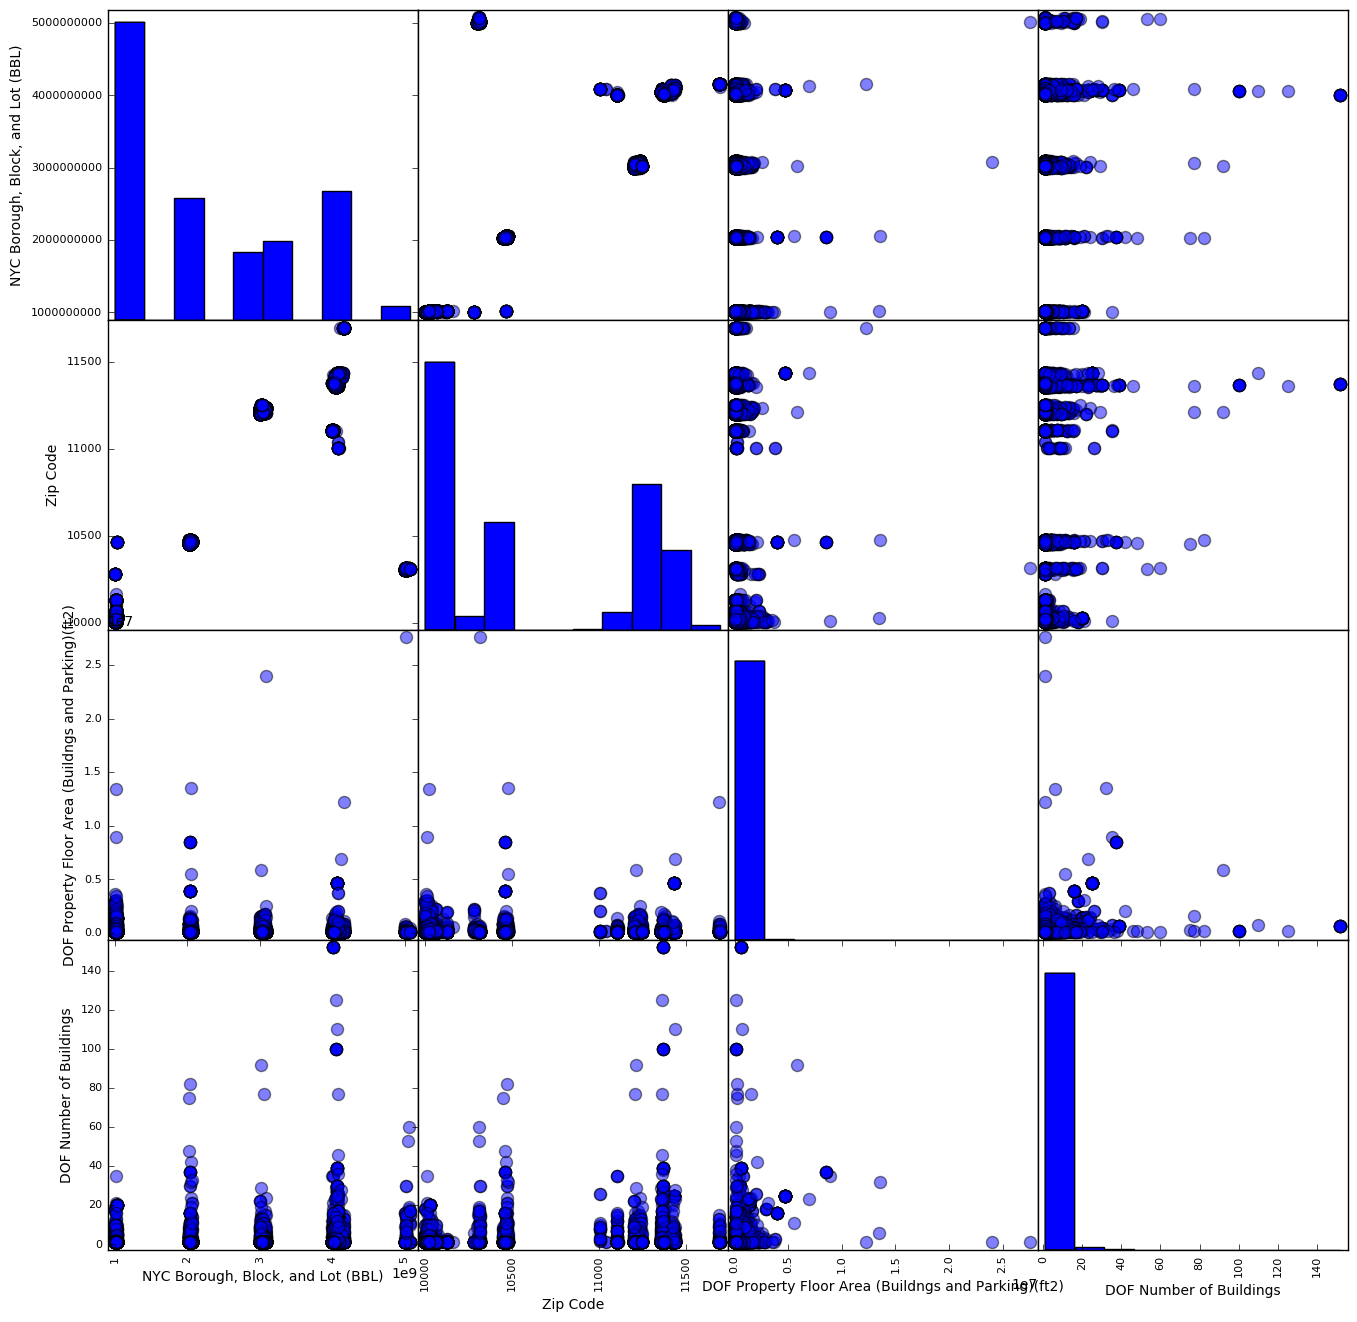

In [6]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

## Cleaning Data

In [7]:
# clean up the data: I only pick necessary columns

nrg1 = nrg.loc[:,('NYC Borough, Block, and Lot (BBL)','Site EUI(kBtu/ft2)','Source EUI(kBtu/ft2)',
                 'Reported Property Floor Area (Building(s)) (ft²)','ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)')].copy()
bsize1 = bsize.loc[:,('BBL','UnitsTotal','Borough','YearBuilt')].copy()

In [8]:
# this formula is to convert the non-convertable values into float

def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [9]:
# replace the entries that failed to be converted to 'NaN'
indx = (np.vectorize(canconvert)(nrg1['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg1['Reported Property Floor Area (Building(s)) (ft²)'][~indx] = float('NaN')

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
indx = (np.vectorize(canconvert)(nrg1['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg1['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
indx = (np.vectorize(canconvert)(nrg1['NYC Borough, Block, and Lot (BBL)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg1['NYC Borough, Block, and Lot (BBL)'][~indx] = float('NaN')

invalid entries changed to NaN 16170


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
indx = (np.vectorize(canconvert)(nrg1['ENERGY STAR Score']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg1['ENERGY STAR Score'][~indx] = float('NaN')

invalid entries changed to NaN 4412


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
indx = (np.vectorize(canconvert)(nrg1['Total GHG Emissions(MtCO2e)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg1['Total GHG Emissions(MtCO2e)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [14]:
indx = (np.vectorize(canconvert)(bsize1['YearBuilt']))
print ("invalid entries changed to NaN %d"%sum(indx))
bsize1['YearBuilt'][~indx] = float('NaN')

invalid entries changed to NaN 42786


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Merge The Dataset

In [15]:
nrg1['BBL'] = nrg1['NYC Borough, Block, and Lot (BBL)']
bblnrgdata = pd.merge(nrg1, bsize1, on='BBL')
bblnrgdata.head(10)

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),ENERGY STAR Score,Total GHG Emissions(MtCO2e),BBL,UnitsTotal,Borough,YearBuilt
0,1.006700e+09,NaN,NaN,NaN,NaN,NaN,1.006700e+09,1,MN,1987
1,1.004370e+09,NaN,NaN,NaN,NaN,NaN,1.004370e+09,4,MN,1920
2,1.013110e+09,125.4,239.8,330000,68,3556.4,1.013110e+09,56,MN,1977
3,1.009220e+09,NaN,NaN,NaN,NaN,NaN,1.009220e+09,148,MN,1963
4,1.007400e+09,NaN,NaN,68329,NaN,NaN,1.007400e+09,1,MN,1920
5,1.012770e+09,NaN,NaN,66546,NaN,NaN,1.012770e+09,16,MN,1927
6,1.008830e+09,NaN,NaN,58456,NaN,NaN,1.008830e+09,3,MN,1910
7,1.002830e+09,NaN,NaN,NaN,NaN,NaN,1.002830e+09,1,MN,1910
8,1.008210e+09,NaN,NaN,73000,NaN,NaN,1.008210e+09,8,MN,1906
9,1.008240e+09,NaN,NaN,74027,NaN,NaN,1.008240e+09,11,MN,1901


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c6102b240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c60bd7358>]], dtype=object)

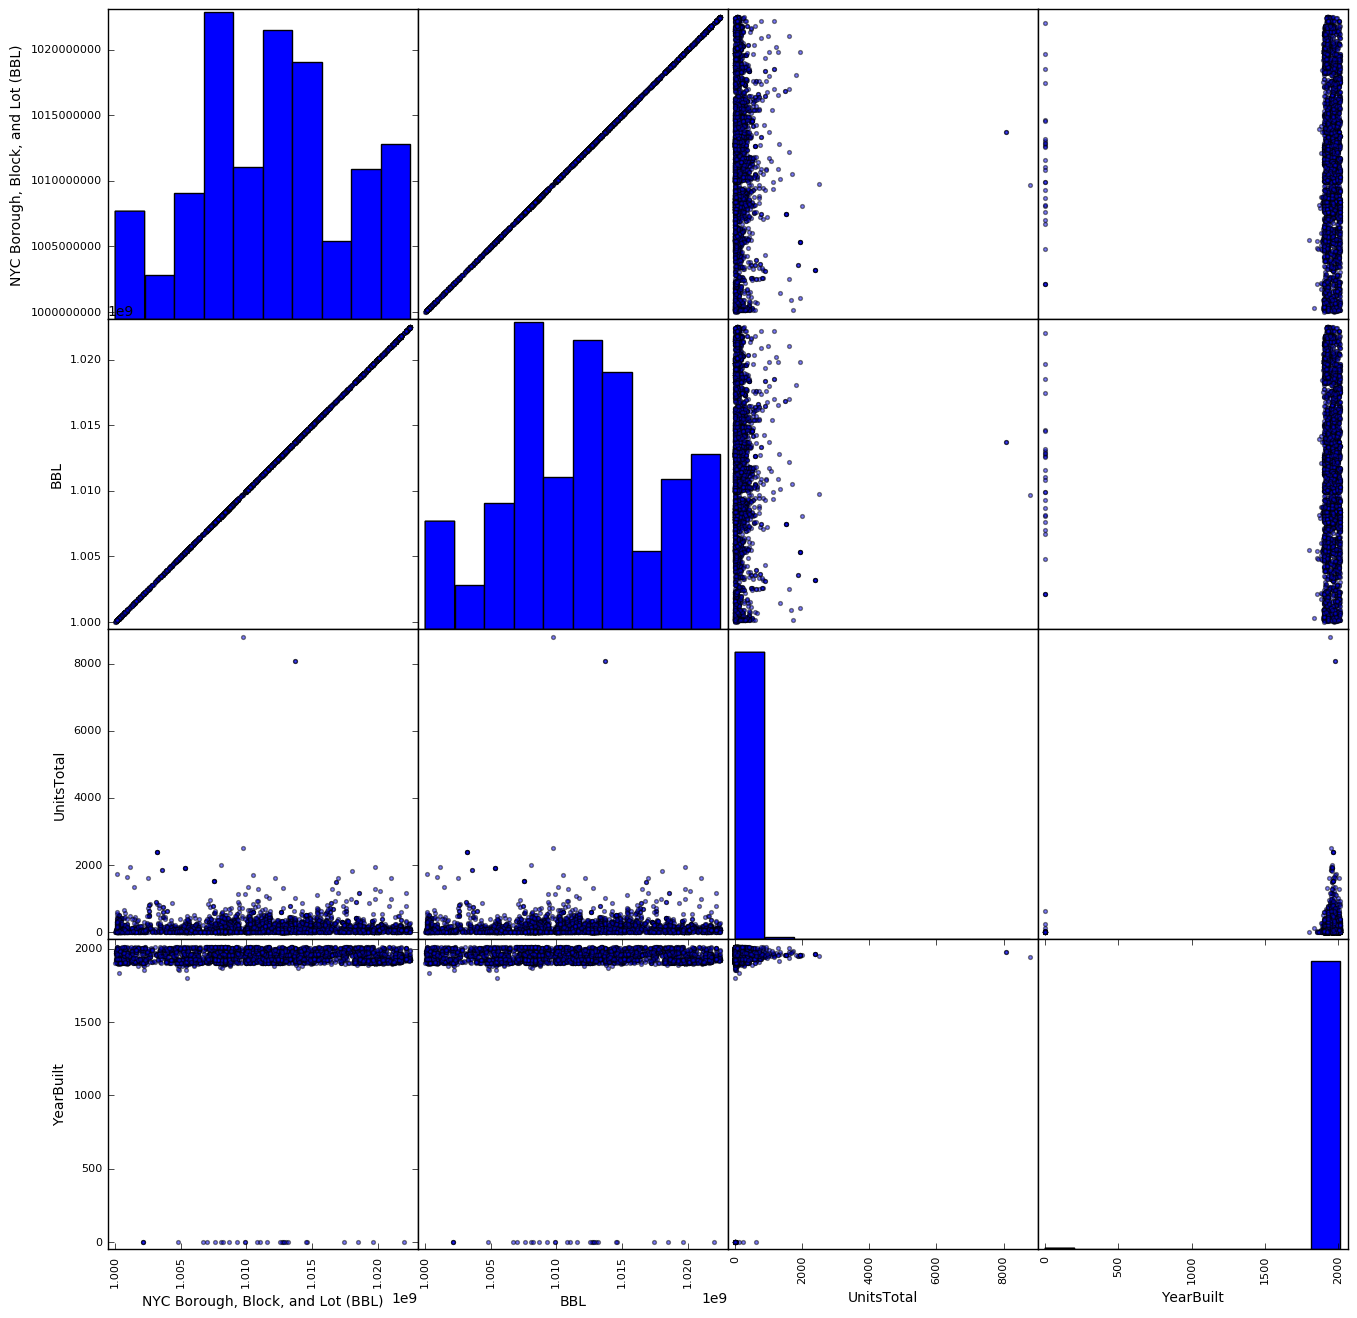

In [16]:
scatter_matrix(bblnrgdata,s = 30, figsize=(16,16))

## Prepare Data for Regression
Add Total Energy column

In [18]:
bblnrgdata["TotalEnergy"] = bblnrgdata['Site EUI(kBtu/ft2)'].astype(float) * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

In [19]:
bblnrgdata.TotalEnergy.head()

0           NaN
1           NaN
2    41382000.0
3           NaN
4           NaN
Name: TotalEnergy, dtype: float64

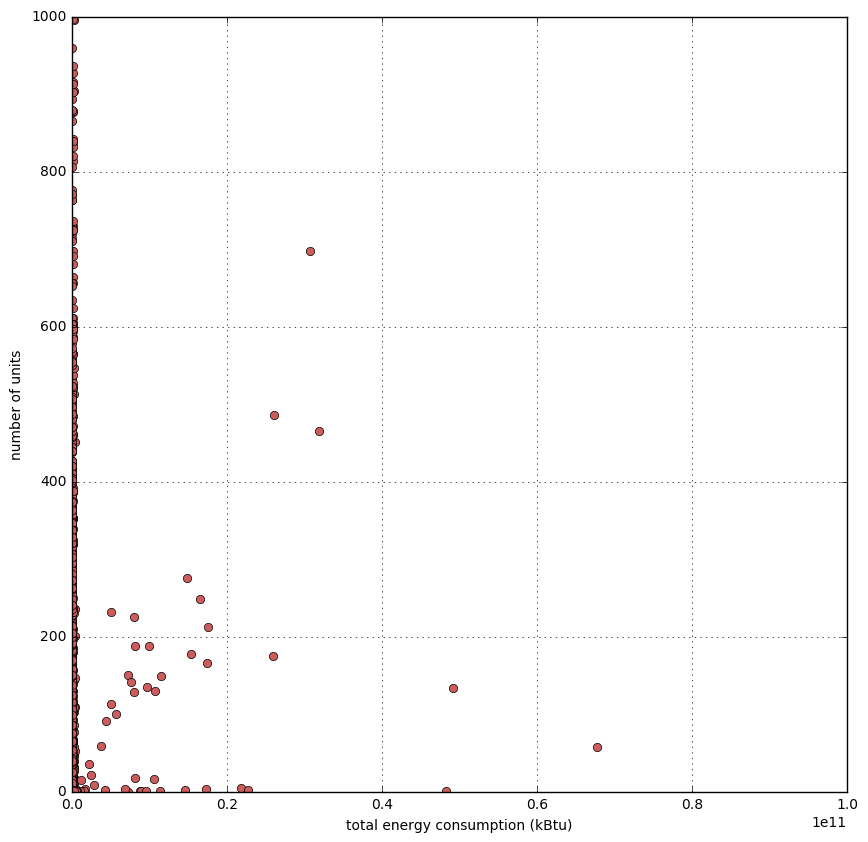

In [20]:
# first scatter plot:
plt.figure(figsize = (10,10))
plt.plot(bblnrgdata.TotalEnergy,bblnrgdata.UnitsTotal, 'o',c='IndianRed')
plt.ylim(0,1000)
plt.xlim(0,1e11)
plt.xlabel('total energy consumption (kBtu)')
plt.ylabel('number of units')
plt.grid()

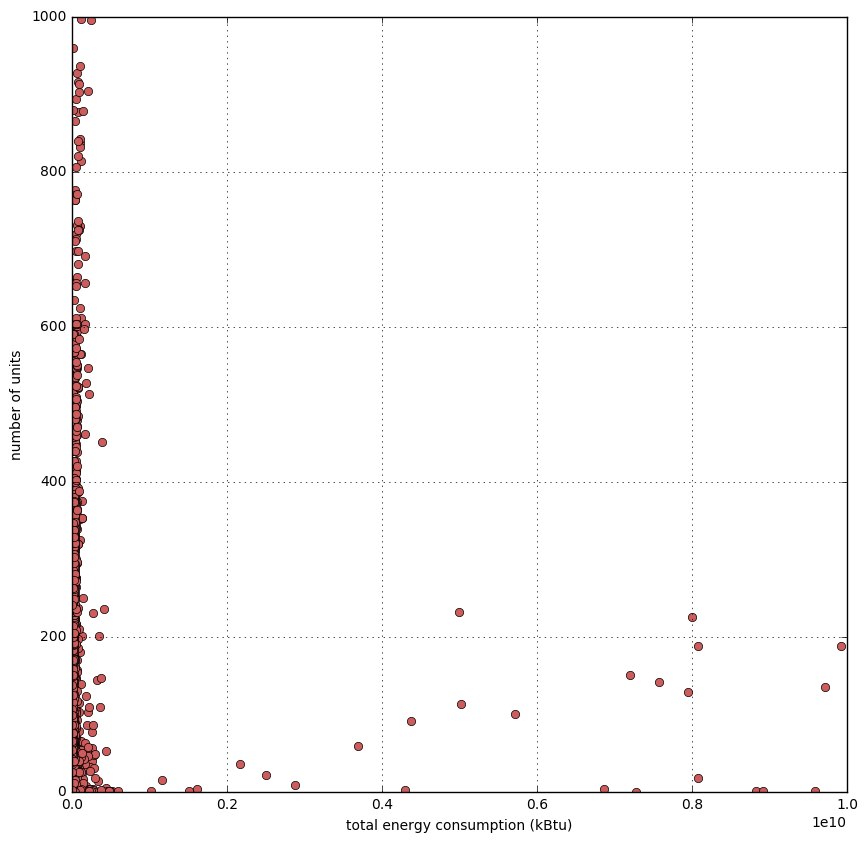

In [21]:
# zoomed in scatter plot
plt.figure(figsize = (10,10))
plt.plot(bblnrgdata.TotalEnergy,bblnrgdata.UnitsTotal, 'o', c='IndianRed')
plt.ylim(0,1000)
plt.xlim(0,1e10)
plt.xlabel('total energy consumption (kBtu)')
plt.ylabel('number of units')
plt.grid()

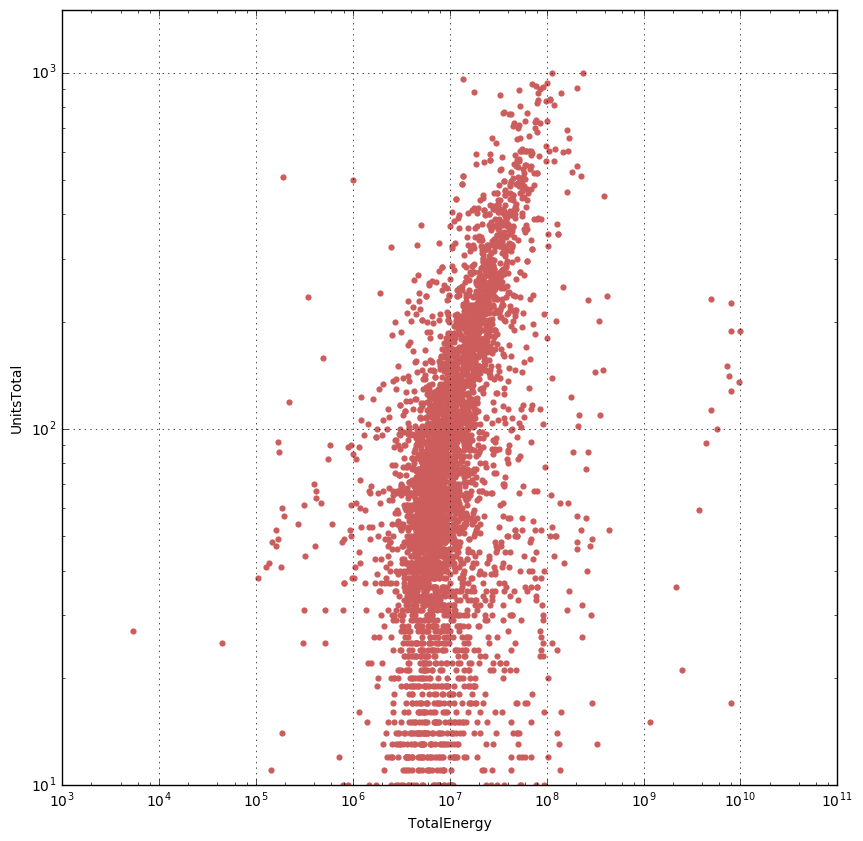

In [22]:
# cut the data
bblnrg_cut = bblnrgdata[(bblnrgdata.TotalEnergy > 1000) & (bblnrgdata.TotalEnergy < 1e10) 
                        & (bblnrgdata.UnitsTotal>=10) & (bblnrgdata.UnitsTotal<1000)].copy()
bblnrg_cut.plot(kind='scatter',
                x='TotalEnergy',y='UnitsTotal', 
                marker='o',  figsize=(10, 10), loglog=True, lw=0, c='IndianRed')
plt.ylim(10,1500)
plt.grid()

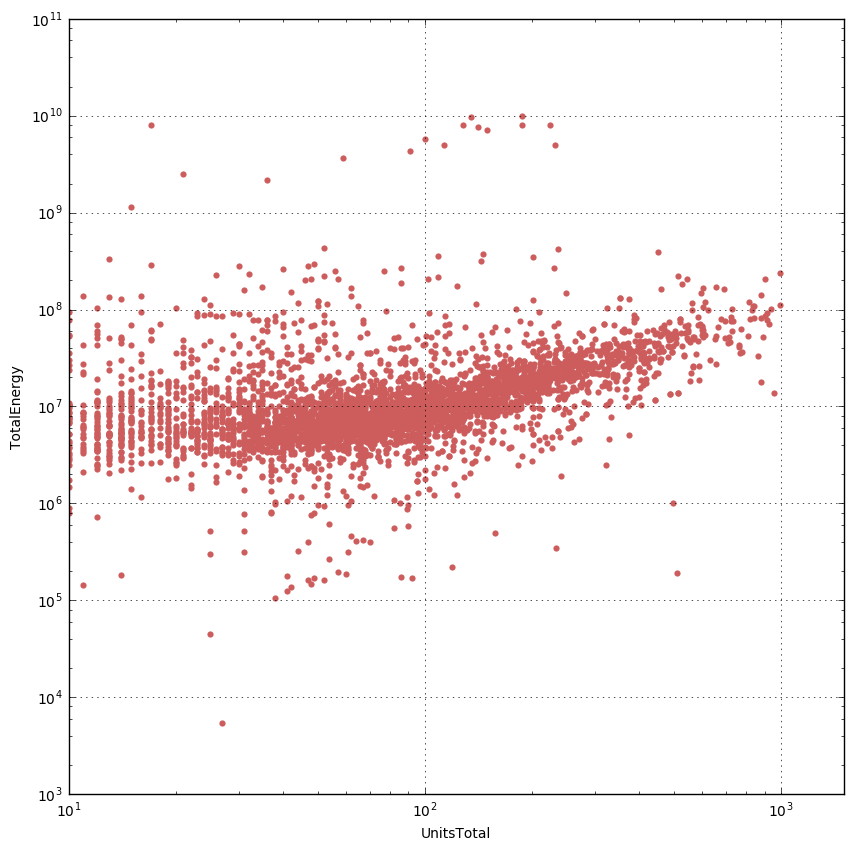

In [23]:
bblnrg_cut.plot(kind='scatter',y='TotalEnergy',x='UnitsTotal', 
                marker='o',  figsize=(10, 10), loglog=True,
               lw=0,c='IndianRed')
plt.xlim(10,1500)
plt.grid()

## Regression

In [25]:
# make a function to create regression
def regress(x,y):
    X = sm.add_constant(np.log10(bblnrg_cut[x]))
    lm = sm.OLS(np.log10(bblnrg_cut[y]), X, missing='drop').fit() 
    print(lm.summary())
    
    plt.figure(figsize=(8,8))
    plt.scatter(np.log10(bblnrg_cut[x]), np.log10(bblnrg_cut[y]), lw=0,c='IndianRed')
    plt.plot(np.log10(bblnrg_cut[x]), lm.predict(), 'k', lw=2)
    plt.xlabel(x), plt.ylabel(y)
    plt.grid()
    return lm.predict(),lm

### Regression 1: UnitsTotal ~ TotalEnergy

                            OLS Regression Results                            
Dep. Variable:            TotalEnergy   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     907.8
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          7.05e-181
Time:                        16:21:35   Log-Likelihood:                -2151.1
No. Observations:                4239   AIC:                             4306.
Df Residuals:                    4237   BIC:                             4319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1362      0.030    205.065      0.0

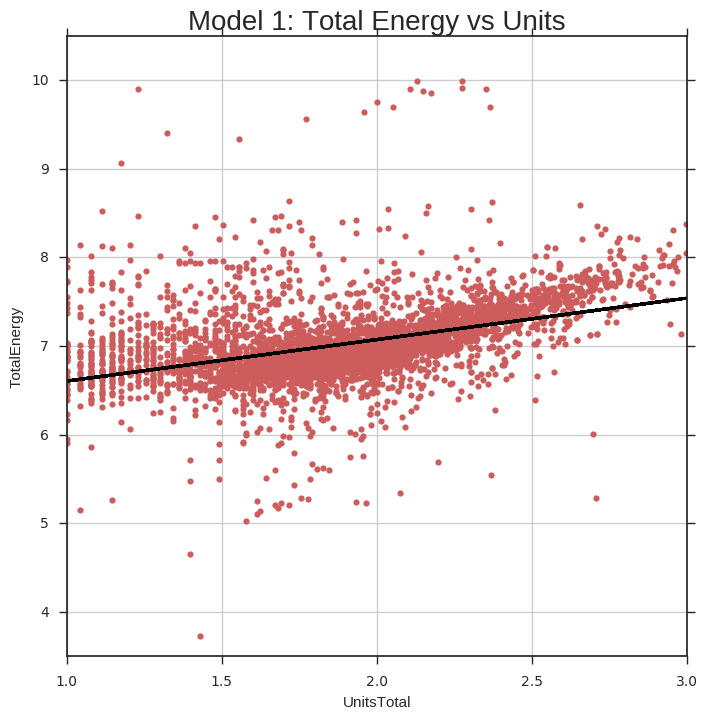

In [105]:
pred1, linemodel = regress('UnitsTotal','TotalEnergy')
plt.xlim(1,3)
plt.ylim(3.5,10.5)
plt.title('Model 1: Total Energy vs Units', fontsize = 20)

### Regression 2: TotalEnergy ~ UnitsTotal

                            OLS Regression Results                            
Dep. Variable:             UnitsTotal   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     907.8
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          7.05e-181
Time:                        16:21:06   Log-Likelihood:                -1692.9
No. Observations:                4239   AIC:                             3390.
Df Residuals:                    4237   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const          -0.7612      0.088     -8.650      

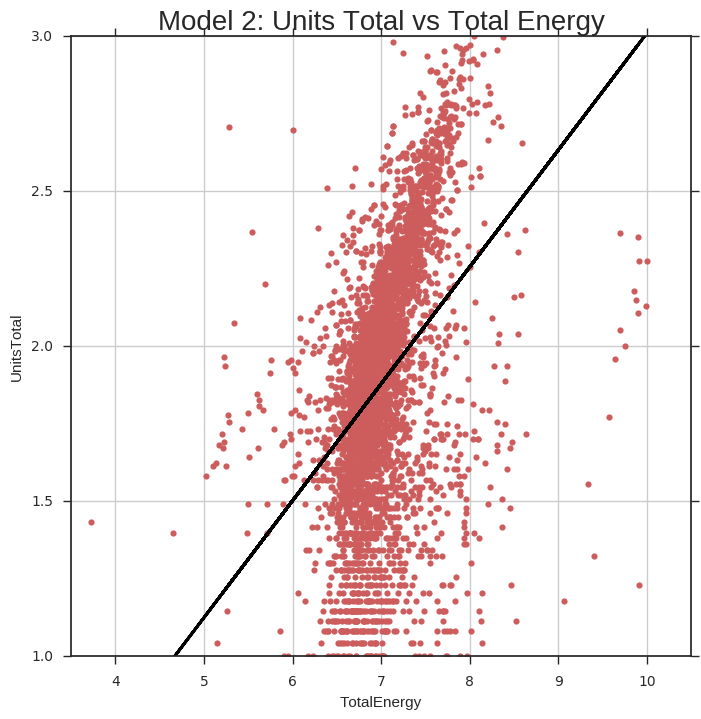

In [104]:
pred2, lm2 = regress('TotalEnergy','UnitsTotal')
plt.ylim(1,3)
plt.xlim(3.5,10.5)
plt.title('Model 2: Units Total vs Total Energy', fontsize = 20)

## Calculate Chi-Square

In [28]:
# create a new dataframe contains log Units, log Energy, and results
df = pd.DataFrame({'LogUnits': np.log10(bblnrg_cut.UnitsTotal),
                 'LogEnergy': np.log10(bblnrg_cut.TotalEnergy),
                 'Pred1': pred1,
                 'Pred2': pred2})
df.head(3)

,LogEnergy,LogUnits,Pred1,Pred2
2,7.616811,1.748188,6.954402,2.110566
16,7.629287,1.380211,6.782182,2.115270
18,7.286094,1.380211,6.782182,1.985877


In [29]:
# calculate chi-square
# sqrt of data in log space equals its log value divided by 2
df['Err1'] = df['LogEnergy']/2
df['Err2'] = df['LogUnits']/2
df['Chisq1'] = (df['Pred1'] - df['LogEnergy'])**2/(df['Err1']**2)
df['Chisq2'] = (df['Pred2'] - df['LogUnits'])**2/(df['Err2']**2)
df.head(3)

,LogEnergy,LogUnits,Pred1,Pred2,Err1,Err2,Chisq1,Chisq2
2,7.616811,1.748188,6.954402,2.110566,3.808406,0.874094,0.030253,0.171873
16,7.629287,1.380211,6.782182,2.115270,3.814644,0.690106,0.049314,1.134522
18,7.286094,1.380211,6.782182,1.985877,3.643047,0.690106,0.019133,0.770256


In [30]:
print('Chi Square model 1 = '+ str(df['Chisq1'].sum()))
print('Chi Square model 2 = '+ str(df['Chisq2'].sum()))

Chi Square model 1 = 55.9026976932
Chi Square model 2 = 991.313699012


As we can see, model 1 (UnitsTotal as x axis) returns smaller chi-square, therefore **model 1 is better than model 2.**

## Regression 2nd Degree Polynomial and Likelihood Ratio

In [32]:
# fit a 2nd degree polynomial
df['LogUnits_Square'] = df['LogUnits']**2
curvemodel = smf.ols(formula = 'LogEnergy ~ LogUnits_Square + LogUnits', data=df).fit()
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              LogEnergy   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     691.2
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          1.64e-260
Time:                        15:36:17   Log-Likelihood:                -1964.0
No. Observations:                4239   AIC:                             3934.
Df Residuals:                    4236   BIC:                             3953.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           8.0474      0.101     79.831      0.000         7.850     8.245
LogUnits_Square     0.5539      0.028     19.774      0.000         0.499     0.609
LogUnits           -1.6364      0.107    -15.228      0.000        -1.847    -1.426
==============================================================================
Omnibus:                     1569.621   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31966.060
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                      16.215   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

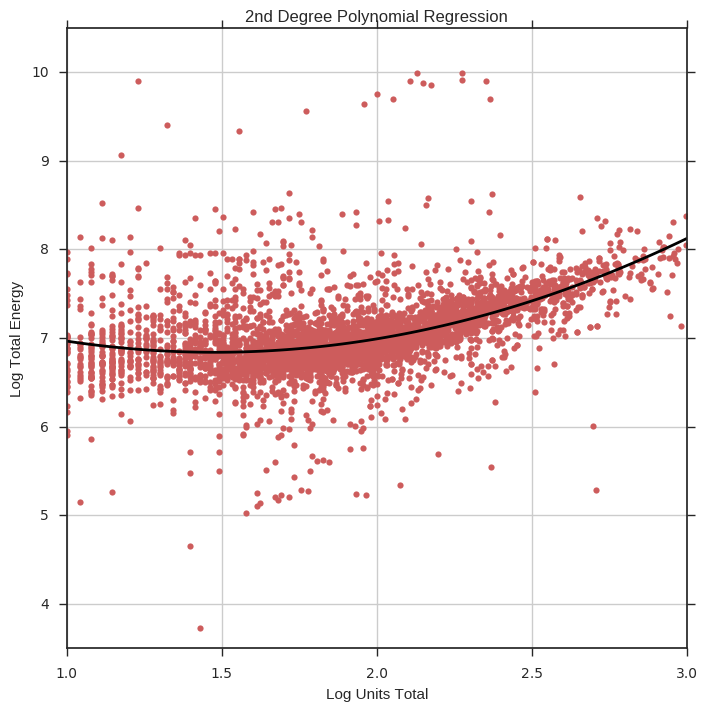

In [101]:
# visualize the model
x = np.linspace(1,3,100)
plt.figure(figsize=(8,8))
plt.scatter(df.LogUnits, df.LogEnergy, lw=0,c='IndianRed')
plt.plot(x, curvemodel.params[1]*x**2+curvemodel.params[2]*x+curvemodel.params[0], 'k', lw=2)
plt.xlim(1,3)
plt.ylim(3.5,10.5)
plt.xlabel('Log Units Total')
plt.ylabel('Log Total Energy')
plt.title('2nd Degree Polynomial Regression')
plt.grid()

In [34]:
# calculate likelihood ratio
print ("LR : ", -2 * (-linemodel.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linemodel))

LR :  -374.257337555
LR from statsmodels: (374.25733755531201, 2.2143888093739187e-83, 1.0)


### Hypotheses
H0: Model 1 (linear) is preferable to Model 2 (2nd degree polynomial)

H1: Model 2 is preferable to Model 1

$\alpha$ = 0.05

Here we get p value 2.2143888093739187e-83 LR from statsmodels which is smaller than 0.05. Thus, **H0 is REJECTED**

## Extra Credit 1: Calculate and Plot Likelihood Surface

In [35]:
# preview the data
df.head()

,LogEnergy,LogUnits,Pred1,Pred2,Err1,Err2,Chisq1,Chisq2,LogUnits_Square
2,7.616811,1.748188,6.954402,2.110566,3.808406,0.874094,0.030253,0.171873,3.056161
16,7.629287,1.380211,6.782182,2.115270,3.814644,0.690106,0.049314,1.134522,1.904983
18,7.286094,1.380211,6.782182,1.985877,3.643047,0.690106,0.019133,0.770256,1.904983
19,6.950549,1.792392,6.975090,1.859368,3.475275,0.896196,0.000050,0.005585,3.212668
20,6.811909,1.929419,7.039221,1.807097,3.405954,0.964709,0.004454,0.016077,3.722657


In [36]:
# calculate value for each element in 2D array
def residuals(a,b,data):
    return (((data['LogEnergy']-(data['LogUnits']*a+b))**2)/data['Err1']).sum()

A = np.arange(-50.0, 50.0, 0.5)
B = np.arange (-100, 100, 1)

b = linemodel.params[0]
a = linemodel.params[1]

Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B): 
        Lsurface[i][j] = np.nansum(residuals(a,b,df))

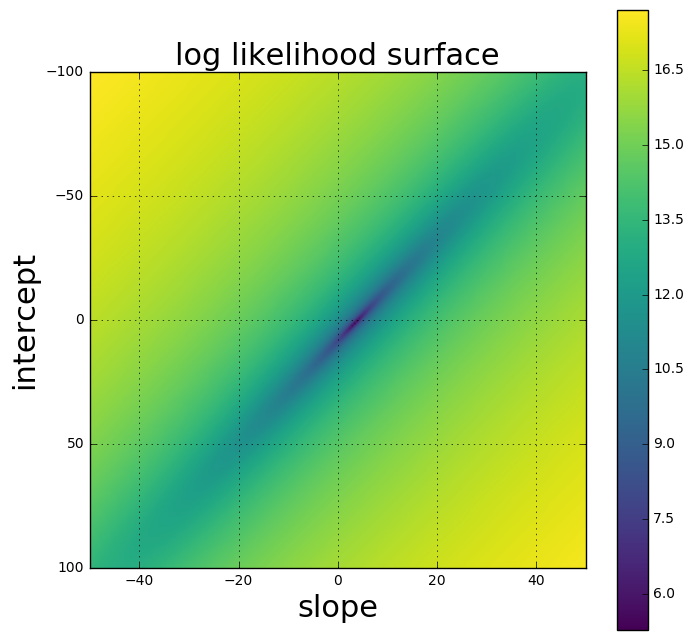

In [37]:
# plot the likelihood surface
plt.figure(figsize=(8,8))
plt.title ("log likelihood surface", fontsize = 22)
plt.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5, cmap='viridis')
plt.xlabel('slope', fontsize = 22)
plt.ylabel('intercept', fontsize = 22)
plt.grid()
plt.colorbar()

## Extra Credit 2: Make insightful plots

In [38]:
bblnrg_cut.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),ENERGY STAR Score,Total GHG Emissions(MtCO2e),BBL,UnitsTotal,Borough,YearBuilt,TotalEnergy
2,1.013110e+09,125.4,239.8,330000,68,3556.4,1.013110e+09,56,MN,1977,41382000.0
16,1.008150e+09,117,257,364000,52,3613,1.008150e+09,24,MN,1954,42588000.0
18,1.005050e+09,82.1,201.3,235370,44,1392.3,1.005050e+09,24,MN,1926,19323877.0
19,1.021420e+09,137.69999999999999,192.5,64806,NaN,673.6,1.021420e+09,62,MN,1924,8923786.2
20,1.021750e+09,103.2,138.6,62839,NaN,485,1.021750e+09,85,MN,1920,6484984.8


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


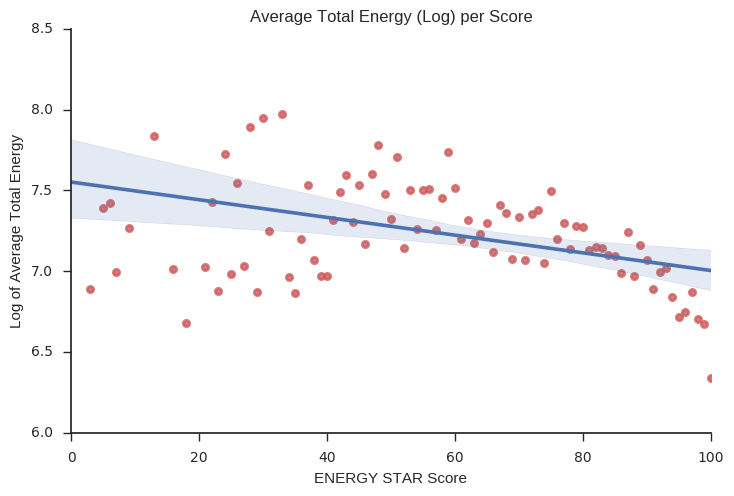

In [40]:
import seaborn as sns
def plotVersusEnergy(columnname):
    sns.set_style('ticks')
    nrgbyscore = np.log10(bblnrg_cut['TotalEnergy']).groupby(bblnrg_cut[columnname]).mean()
    df_nrgbyscore = pd.DataFrame({columnname :nrgbyscore.index.astype(int),
                                 'Log of Average Total Energy':nrgbyscore.values})
    sns.lmplot(x=columnname,y='Log of Average Total Energy', data=df_nrgbyscore[(df_nrgbyscore[columnname]>0)],
               scatter_kws={"color": "indianred", "lw":2}, size=5, aspect=1.5)
    
plotVersusEnergy('ENERGY STAR Score')
plt.xlim(0,100)
plt.ylim(6,8.5)
plt.title('Average Total Energy (Log) per Score')

Exploration Plot 1: Average total energy vs ENERGY STAR Score

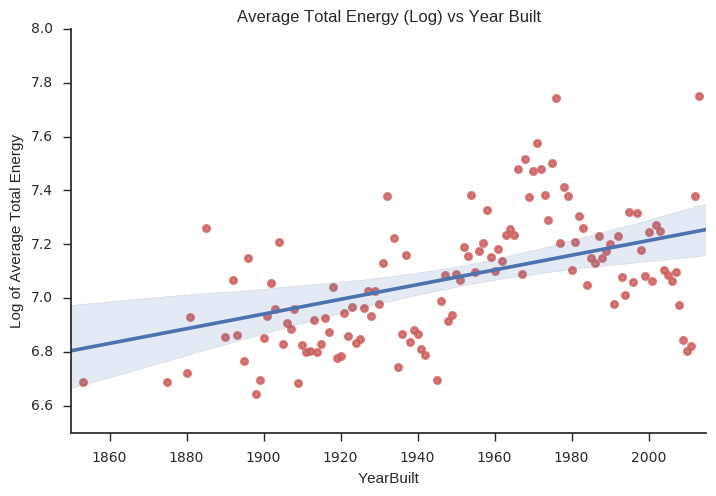

In [41]:
plotVersusEnergy('YearBuilt')
plt.xlim(1850,2015)
plt.ylim(6.5,8)
plt.title('Average Total Energy (Log) vs Year Built')

Exploration Plot 2: Average total energy vs Year Built

In [98]:
# create a heatmap, mapping building age, total units, and average total energy
bblnrg_cut['logUnits'] = np.log2(bblnrg_cut.UnitsTotal).astype(int)
bblnrg_cut['buildingAgeRange'] = np.floor((2016-bblnrg_cut['YearBuilt'])/10).astype(int)
n = np.log10(bblnrg_cut['TotalEnergy']).groupby([bblnrg_cut['buildingAgeRange'],bblnrg_cut['logUnits']]).mean()
ndf = n.reset_index()
npiv = ndf.pivot_table(index='logUnits',columns='buildingAgeRange',values='TotalEnergy')

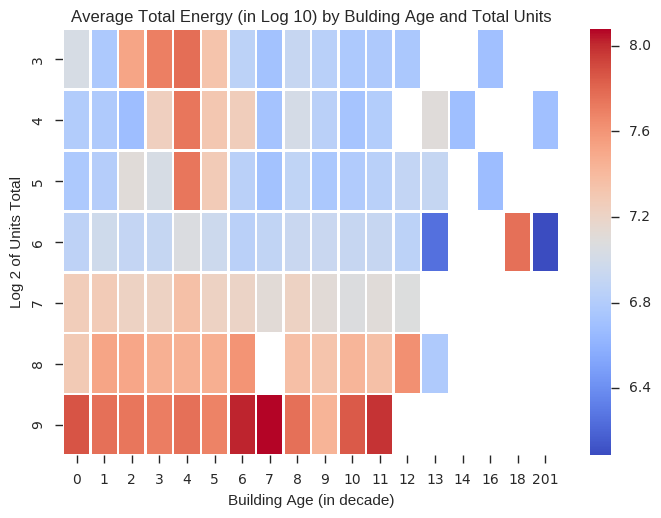

In [99]:
sns.heatmap(npiv,cmap='coolwarm',linecolor='white',linewidths=1)
plt.xlabel('Building Age (in decade)')
plt.ylabel('Log 2 of Units Total')
plt.title('Average Total Energy (in Log 10) by Bulding Age and Total Units')

### Exploration Plot 3: Heatmap of Total Energy compared to the age of the building and total units